In [2]:
import tensorflow as tf
import os 


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
gpus

[]

In [5]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [6]:
import cv2
import imghdr

C:\Users\prath\AppData\Local\Temp\ipykernel_11324\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def random_crop_img(image):
    
    crop_height = 200  # Specify the desired crop height
    crop_width = 600   # Specify the desired crop width

    # Use TensorFlow random crop function
    cropped_image = tf.image.random_crop(image, size=[crop_height, crop_width, 3])

    return cropped_image



# Define image data generator for preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split data into training (80%) and validation (20%)
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    
)

# Set the path to your dataset directory
dataset_path = 'dataset'

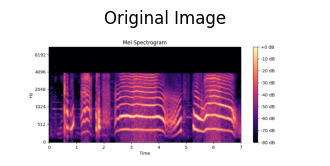

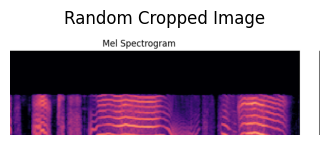

In [50]:
import matplotlib.pyplot as plt
# Load an example image (replace 'path/to/your/image.jpg' with the actual image path)
image_path = 'belly_pain_png/69BDA5D6-0276-4462-9BF7-951799563728-1436936185-1.1-m-26-bp_mel.png'
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)  # Ensure 3 channels (RGB)

# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply random crop to the image
cropped_image = random_crop_img(image)

# Display the cropped image
plt.figure(figsize=(4, 4))
plt.imshow(cropped_image.numpy().astype("uint8"))  # Convert tensor to numpy array for display
plt.title('Random Cropped Image')
plt.axis('off')
plt.show()


In [8]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=8,
    class_mode='categorical',  # Use categorical labels
    subset='training'  # Specify training subset
)

# Load and preprocess validation images
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 1572 images belonging to 5 classes.
Found 391 images belonging to 5 classes.


In [73]:
train_generator

c:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


c:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 81s 388ms/step - accuracy: 0.2213 - loss: 1.9457 - val_accuracy: 0.2737 - val_loss: 1.5841
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 74s 371ms/step - accuracy: 0.2882 - loss: 1.5108 - val_accuracy: 0.3069 - val_loss: 1.5168
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 74s 373ms/step - accuracy: 0.3106 - loss: 1.4554 - val_accuracy: 0.3402 - val_loss: 1.4873
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 76s 383ms/step - accuracy: 0.3138 - loss: 1.4315 - val_accuracy: 0.3069 - val_loss: 1.6694
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 78s 393ms/step - accuracy: 0.3234 - loss: 1.3717 - val_accuracy: 0.3376 - val_loss: 1.5287
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 77s 387ms/step - accuracy: 0.3759 - loss: 1.3285 - val_accuracy: 0.3197 - val_loss: 1.5524
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 76s 383ms/step - accuracy: 0.3589 - loss: 1.3580 - val_accuracy: 0.3171 - val_loss: 1.4949
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 87s 436ms/step - accuracy: 0.3465 - loss: 1.3196 - val

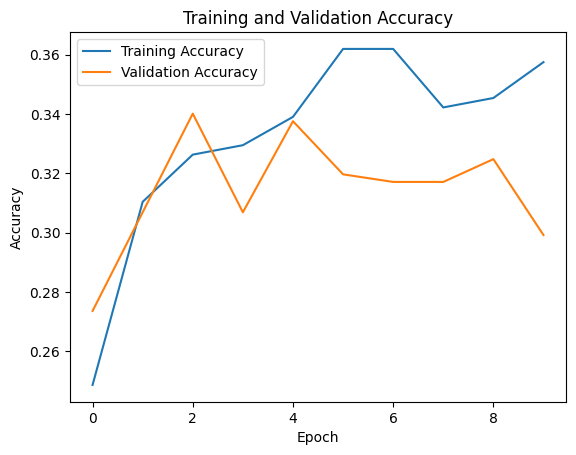

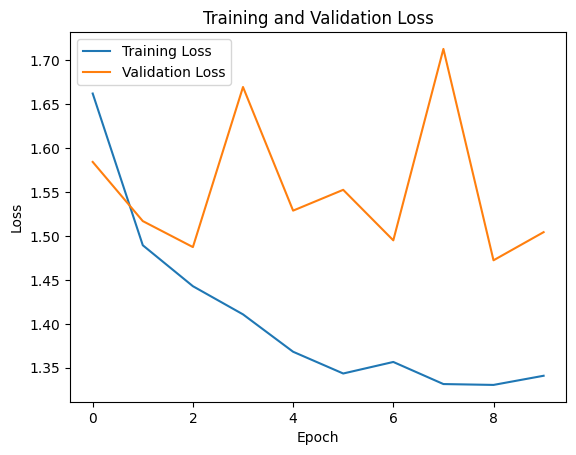

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # 5 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 5 classes for classification
])

# Compile the model with a custom learning rate for the Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/10


c:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 189s 940ms/step - accuracy: 0.2620 - loss: 2.8239 - val_accuracy: 0.3146 - val_loss: 1.6199
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 181s 912ms/step - accuracy: 0.3713 - loss: 1.4506 - val_accuracy: 0.3606 - val_loss: 1.4057
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 195s 983ms/step - accuracy: 0.4305 - loss: 1.3287 - val_accuracy: 0.3913 - val_loss: 1.4194
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 188s 948ms/step - accuracy: 0.4541 - loss: 1.2920 - val_accuracy: 0.3964 - val_loss: 1.4234
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.4877 - loss: 1.2183 - val_accuracy: 0.4220 - val_loss: 1.3298
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 185s 932ms/step - accuracy: 0.4828 - loss: 1.2141 - val_accuracy: 0.4501 - val_loss: 1.4182
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 170s 858ms/step - accuracy: 0.4734 - loss: 1.1547 - val_accuracy: 0.4578 - val_loss: 1.2910
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 168s 848ms/step - accuracy: 0.5401 - loss: 1.0956 

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image you want to predict (replace 'path/to/your/image.jpg' with the actual image path)
img_path = 'belly_pain_png/643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138591-1.0-m-72-bp_mel.png'
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match model's expected sizing
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch size of 1

# Preprocess the image (same preprocessing as used during training)
img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

# Make predictions
predictions = model.predict(img_array)

# Get the class indices from the generator
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

# Get the class labels
class_labels = list(class_indices.keys())
print("Class Labels:", class_labels)

# Convert predictions to percentages for each class
predictions_percentage = predictions[0] * 100  # Assuming batch size of 1

# Print the percentage predictions for the single image
print("Predicted Probabilities:")
for i, class_label in enumerate(class_labels):
    print(f"\t{class_label}: {predictions_percentage[i]:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
Class Indices: {'belly_pain_png': 0, 'burping_png': 1, 'discomfort_png': 2, 'hungry_png': 3, 'tired_png': 4}
Class Labels: ['belly_pain_png', 'burping_png', 'discomfort_png', 'hungry_png', 'tired_png']
Predicted Probabilities:
	belly_pain_png: 5.48%
	burping_png: 5.46%
	discomfort_png: 6.57%
	hungry_png: 78.39%
	tired_png: 4.09%


In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the image you want to augment and predict
img_path = 'tired_png/5B416CE8-2591-4531-9ADC-86D085B5D48B-1430144827-1.0-m-48-ti_mel.png'
img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match model's expected sizing
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch size of 1

# Define ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images
augmented_images = []
num_augmented_images = 10  # Number of augmented images to generate
aug_iter = datagen.flow(img_array, batch_size=1)
for _ in range(num_augmented_images):
    augmented_img = next(aug_iter)  # Get the augmented image from the iterator
    augmented_images.append(augmented_img[0])  # Append the augmented image to the list

# Preprocess the augmented images (same preprocessing as used during training)
augmented_images = np.array(augmented_images) / 255.0  # Normalize pixel values to [0, 1]

# Make predictions for all augmented images
predictions = model.predict(augmented_images)

# Get the class indices from the generator
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

# Get the class labels
class_labels = list(class_indices.keys())
print("Class Labels:", class_labels)

# Convert predictions to percentages for each class for each image
for img_idx, img_pred in enumerate(predictions):
    print(f"Predictions for Augmented Image {img_idx + 1}:")
    predictions_percentage = img_pred * 100
    for i, class_label in enumerate(class_labels):
        print(f"\t{class_label}: {predictions_percentage[i]:.2f}%")


predictions = model.predict(img_array)

# Get the class indices from the generator
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

# Get the class labels
class_labels = list(class_indices.keys())
print("Class Labels:", class_labels)

# Convert predictions to percentages for each class
predictions_percentage = predictions[0] * 100  # Assuming batch size of 1

# Print the percentage predictions for the single image
print("Predicted Probabilities:")
for i, class_label in enumerate(class_labels):
    print(f"\t{class_label}: {predictions_percentage[i]:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Class Indices: {'belly_pain_png': 0, 'burping_png': 1, 'discomfort_png': 2, 'hungry_png': 3, 'tired_png': 4}
Class Labels: ['belly_pain_png', 'burping_png', 'discomfort_png', 'hungry_png', 'tired_png']
Predictions for Augmented Image 1:
	belly_pain_png: 41.10%
	burping_png: 2.09%
	discomfort_png: 15.30%
	hungry_png: 23.09%
	tired_png: 18.41%
Predictions for Augmented Image 2:
	belly_pain_png: 0.33%
	burping_png: 0.94%
	discomfort_png: 1.97%
	hungry_png: 95.49%
	tired_png: 1.26%
Predictions for Augmented Image 3:
	belly_pain_png: 8.44%
	burping_png: 27.84%
	discomfort_png: 31.61%
	hungry_png: 8.24%
	tired_png: 23.88%
Predictions for Augmented Image 4:
	belly_pain_png: 18.44%
	burping_png: 1.77%
	discomfort_png: 13.50%
	hungry_png: 51.16%
	tired_png: 15.13%
Predictions for Augmented Image 5:
	belly_pain_png: 9.92%
	burping_png: 3.15%
	discomfort_png: 10.36%
	hungry_png: 67.15%
	tired_png: 9.43%
Predictions for Augmented Image 6:
	belly_pain_png: 0.94%


In [72]:
import matplotlib.pyplot as plt

# Extract a batch of images from the generator
batch_images, batch_labels = train_generator

# Display the images in the batch
plt.figure(figsize=(12, 12))
for i in range(len(batch_images)):
    plt.subplot(4, 8, i+1)
    plt.imshow(batch_images[i])
    plt.title(f'Class: {batch_labels[i].argmax()}')  # Show the class index
    plt.axis('off')
plt.show()


ValueError: too many values to unpack (expected 2)

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image

# Path to the directory containing classes with fewer samples
class_dir = 'discomfort_png'

# Directory to save augmented images
save_dir = 'discomfort_png'
os.makedirs(save_dir, exist_ok=True)

# Choose augmentation parameters
datagen = ImageDataGenerator(
    \
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# List all image files in the class directory
image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir) if f.endswith('.png')]

# Generate and save augmented images
num_augmented_images = 14  # Number of augmented images to generate per original image

for img_path in image_files:
    img = np.array(Image.open(img_path))
    img = img.reshape((1,) + img.shape)  # Reshape for the flow method

    # Generate augmented images
    i = 0
    for batch in datagen.flow(img, batch_size=1):
        augmented_img = batch[0]
        save_path = os.path.join(save_dir, f"augmented_{i}_{os.path.basename(img_path)}")
        Image.fromarray(augmented_img.astype(np.uint8)).save(save_path)
        i += 1
        if i >= num_augmented_images:
            break


In [102]:
import tensorflow as tf

def random_transform_img(image):
    # Define parameters for image transformations
    # You can adjust these parameters as needed
    rotation_range = 30  # Rotation angle range in degrees
    width_shift_range = 0.2  # Fraction of total width
    height_shift_range = 0.2  # Fraction of total height
    shear_range = 0.2  # Shear intensity (in radians)
    zoom_range = 0.2  # Range for random zoom
    horizontal_flip = True  # Randomly flip images horizontally

    # Use TensorFlow image transformations
    transformed_image = tf.keras.preprocessing.image.random_rotation(image, rotation_range)
    transformed_image = tf.keras.preprocessing.image.random_shift(transformed_image,
                                                                  width_shift_range,
                                                                  height_shift_range)
    transformed_image = tf.keras.preprocessing.image.random_shear(transformed_image, shear_range)
  
    
    if horizontal_flip and tf.random.uniform(()) > 0.5:
        transformed_image = tf.image.flip_left_right(transformed_image)

    return transformed_image

# Example usage:
# Assuming 'image' is your input image tensor
# transformed_img = random_transform_img(image)


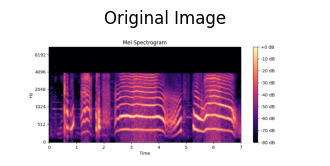

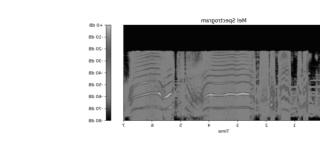

In [103]:
import matplotlib.pyplot as plt
# Load an example image (replace 'path/to/your/image.jpg' with the actual image path)
image_path = 'belly_pain_png/69BDA5D6-0276-4462-9BF7-951799563728-1436936185-1.1-m-26-bp_mel.png'
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)  # Ensure 3 channels (RGB)

# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply random crop to the image
cropped_image = random_transform_img(image)

# Display the cropped image
plt.figure(figsize=(4, 4))
plt.imshow(cropped_image.numpy().astype("uint8"))  # Convert tensor to numpy array for display

plt.axis('off')
plt.show()


In [19]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('data - copy.csv')

data = data.drop('Cry_Audio_File', axis=1)

# Separate features and target variable
X = data.drop('Cry_Reason', axis=1)  # Features
y = data['Cry_Reason']  # Target variable

# Splitting the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

# Fit and transform the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=42)

# Train the SVM model
svm_model.fit(X_resampled, y_resampled)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.782608695652174
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.78      1.00      0.88        72
           4       0.00      0.00      0.00         7

    accuracy                           0.78        92
   macro avg       0.16      0.20      0.18        92
weighted avg       0.61      0.78      0.69        92



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
#import lightgbm as lgb
import catboost as cb
from sklearn.datasets import load_iris

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('data - copy.csv')

data = data.drop('Cry_Audio_File', axis=1)

# Separate features and target variable
X = data.drop('Cry_Reason', axis=1)  # Features
y = data['Cry_Reason']  # Target variable

# Splitting the dataset into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

# Fit and transform the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    #'LightGBM': lgb.LGBMClassifier(),
    'CatBoost': cb.CatBoostClassifier(verbose=0)  # Set verbose=0 to suppress CatBoost output
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.4f}')


c:\Program Files\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.1630
Decision Tree Accuracy: 0.6304
Random Forest Accuracy: 0.7391
XGBoost Accuracy: 0.7065
CatBoost Accuracy: 0.6848


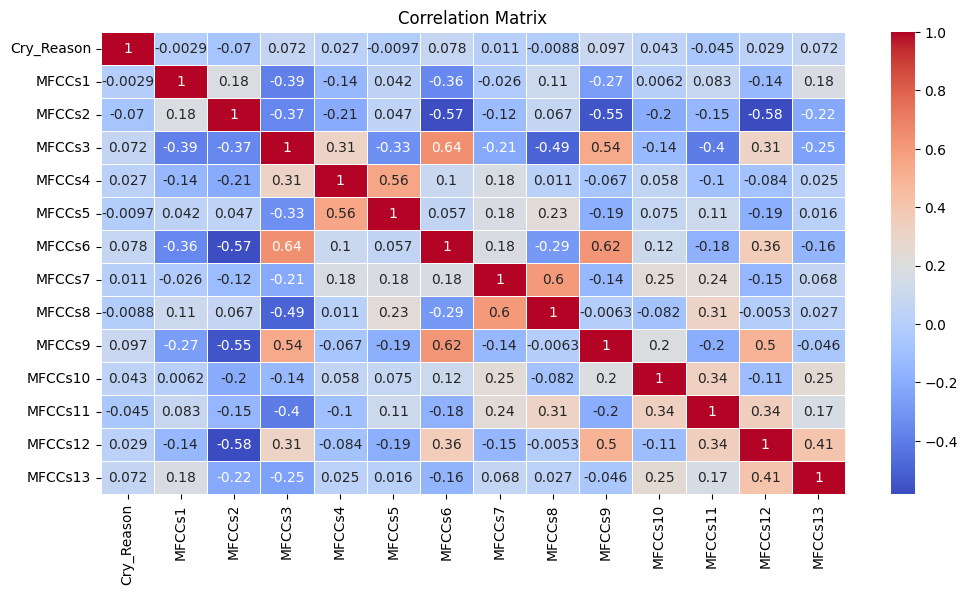

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()


plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
data


,Cry_Reason,MFCCs1,MFCCs2,MFCCs3,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,0,-606.60547,93.934900,-47.782738,-15.073559,10.004257,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095
1,0,-628.12067,101.602480,-34.459390,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
2,0,-585.09564,86.385560,-67.562416,-22.161522,2.070754,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083
3,0,-538.09910,96.096985,-20.241573,-1.704598,0.226281,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483
4,0,-611.44860,68.682050,-8.392762,7.812110,-9.098410,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,4,-585.74133,34.920387,-21.451134,-4.639066,0.584061,-10.853903,3.248470,6.053586,-5.002748,-0.769779,0.259279,-4.109865,-0.197854
453,4,-698.02094,14.473028,-28.595032,-0.379960,12.435725,-7.656326,-5.199711,2.705278,-2.540238,-0.782420,0.764154,-2.904532,0.247652
454,4,-730.49774,91.801620,-39.901950,-15.367967,6.072005,-23.269968,-11.039415,3.739090,-9.503819,-7.832272,-6.361354,-13.773407,-6.661149
455,4,-462.78146,97.031700,-66.636660,-14.185391,1.068526,-40.488503,-8.189845,-1.425352,-26.041030,-0.625539,7.053206,-12.801304,-3.918470


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('data.csv')
data = data.drop('Cry_Audio_File', axis=1)

# Separate features and target variable
X = data.drop('Cry_Reason', axis=1)  # Features
y = data['Cry_Reason']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy Score: 0.8493150684931507
Accuracy: 0.782608695652174
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.78      1.00      0.88        72
           4       0.00      0.00      0.00         7

    accuracy                           0.78        92
   macro avg       0.16      0.20      0.18        92
weighted avg       0.61      0.78      0.69        92



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('data.csv')
data = data.drop('Cry_Audio_File', axis=1)

# Separate features and target variable
X = data.drop('Cry_Reason', axis=1)  # Features
y = data['Cry_Reason']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)

# Fit and transform the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(X_resampled.shape)

# Define the parameter grid to search
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1],
    'gamma': [0.1],
}

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, y_pred))


(1550, 25)
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Accuracy Score: 0.2651612903225806
Accuracy: 0.782608695652174
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         7
           3       0.78      1.00      0.88        72
           4       0.00      0.00      0.00         7

    accuracy                           0.78        92
   macro avg       0.16      0.20      0.18        92
weighted avg       0.61      0.78      0.69        92



c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
